# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 6
label_name = "stat9"
layers = [2]
epochs = 3000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 6.229039132595062
Epoch 1, Loss 6.2044548988342285
Epoch 2, Loss 6.153568804264069
Epoch 3, Loss 6.130366265773773
Epoch 4, Loss 6.07948511838913
Epoch 5, Loss 6.032921671867371
Epoch 6, Loss 5.998660683631897
Epoch 7, Loss 5.956659495830536
Epoch 8, Loss 5.916134834289551
Epoch 9, Loss 5.881317555904388
Epoch 10, Loss 5.846918284893036
Epoch 11, Loss 5.792436957359314
Epoch 12, Loss 5.7665791511535645
Epoch 13, Loss 5.731416583061218
Epoch 14, Loss 5.69582986831665
Epoch 15, Loss 5.660939335823059
Epoch 16, Loss 5.623280584812164
Epoch 17, Loss 5.587717592716217
Epoch 18, Loss 5.5581570863723755
Epoch 19, Loss 5.513727486133575
Epoch 20, Loss 5.500138521194458
Epoch 21, Loss 5.467222452163696
Epoch 22, Loss 5.427858948707581
Epoch 23, Loss 5.402256906032562
Epoch 24, Loss 5.385853588581085
Epoch 25, Loss 5.3546037673950195
Epoch 26, Loss 5.313680946826935
Epoch 27, Loss 5.285813271999359
Epoch 28, Loss 5.27223265171051
Epoch 29, Loss 5.245754063129425
Epoch 30, Loss 5.21

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

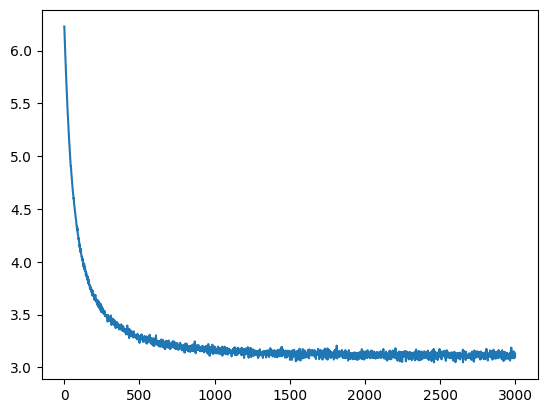

In [5]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

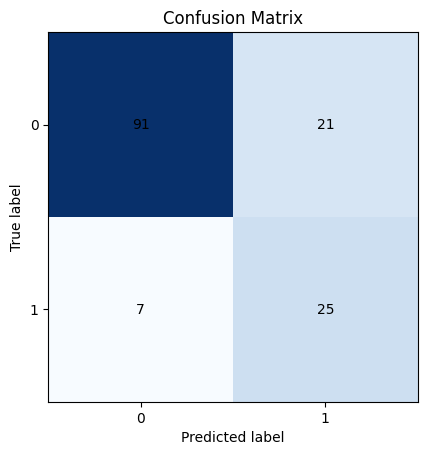

Accuracy for class 0 = 81.25%
Accuracy for class 1 = 78.125%
Overall accuracy = 80.55555555555556%


In [6]:
confusion_matrix = evaluate_model(model, test_dataset)

confusion_matrix.plot()

confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

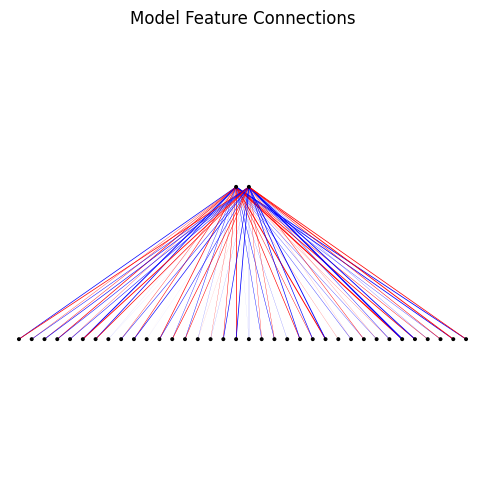

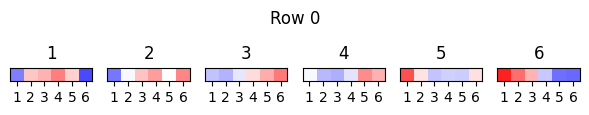

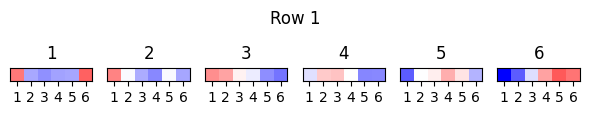

In [7]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)